## Real Estate - Price Predictor

In [46]:
import pandas as pd

In [47]:
housing=pd.read_csv("data.csv")

In [48]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [49]:
housing.info()#null values findout

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [50]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [51]:
housing['TAX'].value_counts()

TAX
666    132
307     40
403     30
437     15
304     14
      ... 
244      1
280      1
351      1
422      1
187      1
Name: count, Length: 66, dtype: int64

In [52]:
housing.describe() #count shows non null values,std is standard deviation,25% val less than 0.082045

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [53]:
%matplotlib inline  

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

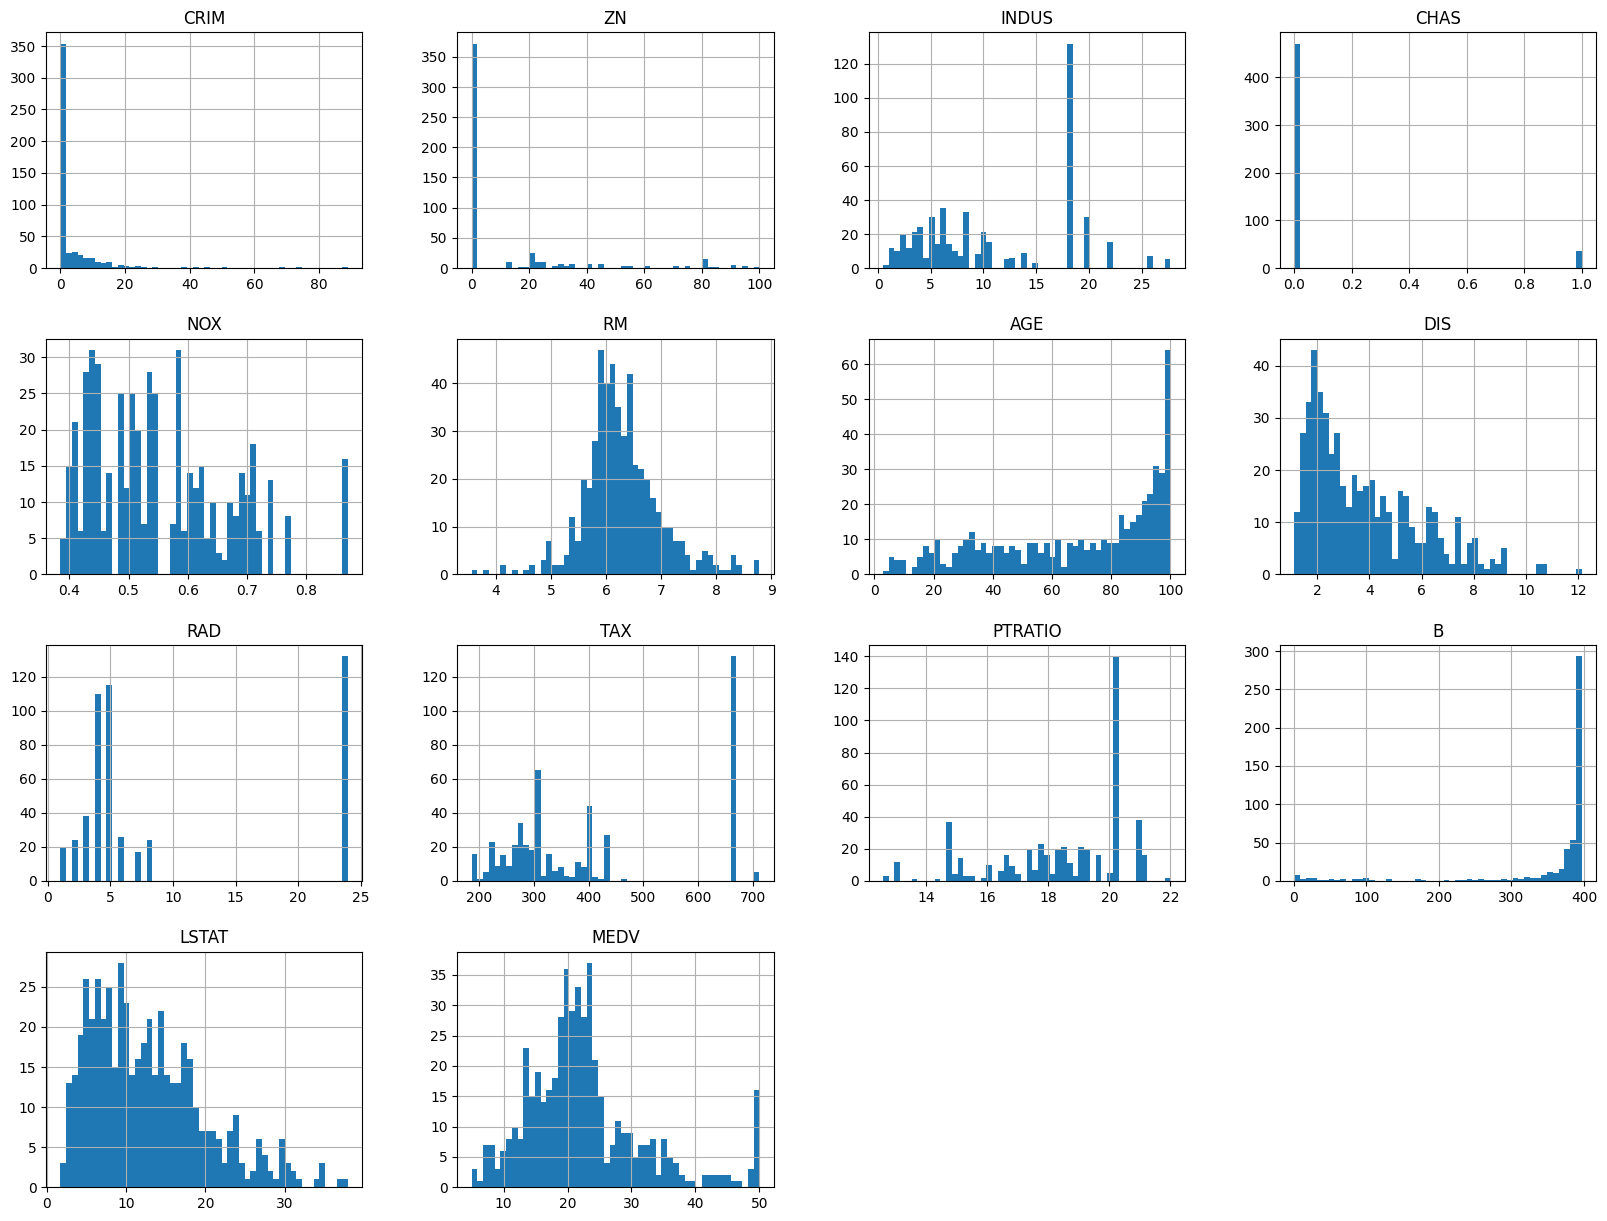

In [54]:
# histogram plotting
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15)) #figsize - height and width , bins means interval

## Train test Splitting

In [55]:
#same funcn available in sklearn !
import numpy as np
def train_test_split(data,test_ratio):
    shuffled=np.random.permutation(len(data))
    np.random.seed(42)#making shuffling fixed , else train and test both will be read by model by some tym creating overfit 
    print(shuffled)
    test_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_size]
    train_indices=shuffled[test_size:]
    return data.iloc[train_indices],data.iloc[test_indices]



In [56]:
#train_set,test_set=train_test_split(housing,0.2)

In [57]:
#print(f"rows in train set {len(train_set)} \n rows in test set {len(test_set)}")

In [58]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"rows in train set {len(train_set)} \n rows in test set {len(test_set)}")

rows in train set 404 
 rows in test set 102


In [59]:
#stratified sampling for equal distribution 

from sklearn.model_selection import StratifiedShuffleSplit
splits=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in splits.split(housing,housing['CHAS']):
    strat_test_set=housing.loc[test_index]
    strat_train_set=housing.loc[train_index]


                                           

In [60]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [61]:
strat_train_set['CHAS'].value_counts()

#### extra .. on how to copy train set data
housing=strat_train_set.copy()#note now ur housing have train data only in housing

In [62]:
# -1 to 1 - correlation matrix
# -1 means strong negative correlation  high -- low
# 1 means strong positive correlation  high -- high ,low -- low
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)



MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>]], dtype=object)

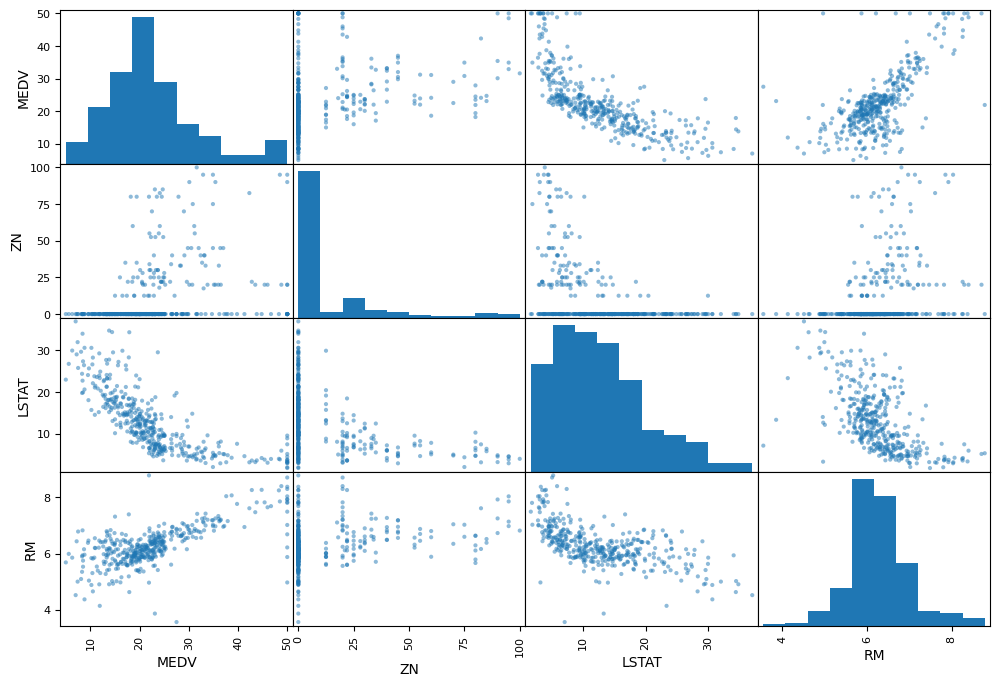

In [63]:
from pandas.plotting import scatter_matrix
attr=['MEDV','ZN','LSTAT','RM']
scatter_matrix(housing[attr],figsize=(12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

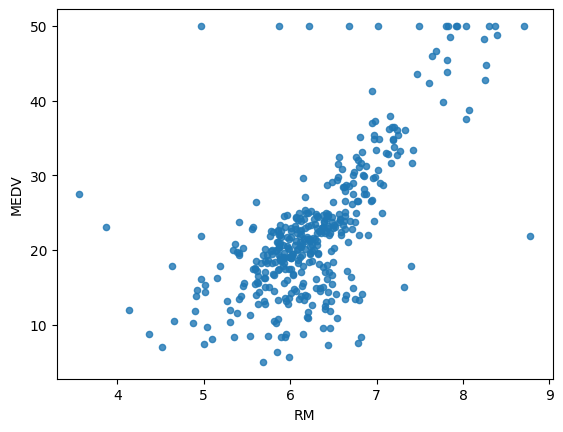

In [64]:
# for any 2 specific attribute view 
housing.plot(kind='scatter',x='RM',y='MEDV',alpha=0.8)

In [65]:
#crearing a new attr from existing attr
housing['TAXRM']=housing['TAX']/housing['RM']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [66]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)


MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525160
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

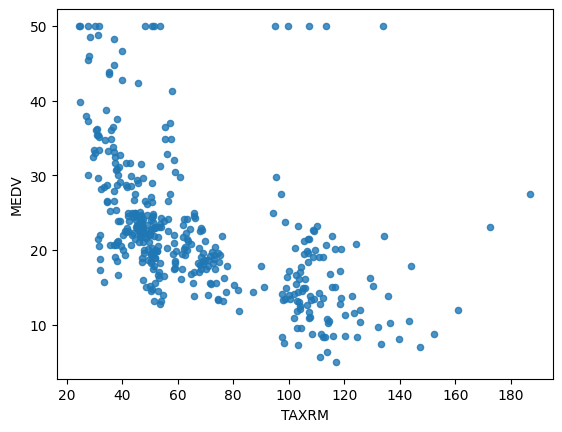

In [67]:
#graph
housing.plot(kind='scatter',x='TAXRM',y='MEDV',alpha=0.8)

In [68]:
housing=strat_train_set.drop("MEDV",axis=1)#housing: Features (inputs) — all columns of strat_train_set except for the target variable MEDV
housing_labels=strat_train_set["MEDV"].copy()#housing_labels: Target (output) — the MEDV column from the dataset, which is the value you're trying to predict

## Missing attributes ?

In [69]:
#remove missing data points,remove the entire attribue col, fill it with median
# optn 1
a=housing.dropna(subset=["RM"])
a.shape#original housing dataset is not changed 

(404, 13)

In [70]:
#optn 2
#axis=1 means column
# this removes RM coulm 
#a=housing.drop("RM",axis=1)  , here a is changed , original is not changed 



#optn 3 , compute median
median_v=housing["RM"].median()
median_v

np.float64(6.21)

In [71]:
housing["RM"].fillna(median_v)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [72]:
housing.shape

(404, 13)

In [73]:
####........this fills up all missing values automatically with mean
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [74]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [75]:
imputer.statistics_    #.shape also u can do

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [76]:
X=imputer.transform(housing)# X is now transformed data 

In [77]:
#creating new dataFrame with transformed data...this fills up all missing values automatically with mean 
housing_trn=pd.DataFrame(X,columns=housing.columns)
housing_trn.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## creating pipeline

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy="median")),# fits & transform
    #...can give any no of list to ur pipeline  # they all fits & transform
    ('std_scaler',StandardScaler())  #last one only fits
])

In [79]:
housing_num_tr=my_pipeline.fit_transform(housing)#last step is fit_transform
housing_num_tr#numpy arr which is used by predictors

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]], shape=(404, 13))

In [80]:
housing_num_tr.shape


(404, 13)

## selecting desired model

In [81]:
#train linear regrsn model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#model=LinearRegression()
model=DecisionTreeRegressor()
model.fit(housing_num_tr,housing_labels)#.fit() method is called, the model learns the relationships between the input features and the target, 

DecisionTreeRegressor()

In [82]:
some_data=housing.iloc[:5] #returns the first 5 rows
some_label=housing_labels.iloc[:5] 

In [83]:
prepared_data=my_pipeline.transform(some_data)
model.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [84]:
list(some_label)

[21.9, 24.5, 16.7, 23.1, 23.0]

## evaluating the model

In [85]:
# for rmse
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)
rmse #4 is not good acc to lin , but decsnTree gave 0 becoz of overfitting(learned noise too)

np.float64(0.0)

## Cross validation technique (better eval techniq)

In [86]:
#1 2 3 4 5 6 7 8 9 10 # remov 1 and train on remaing 2 to 10 ;;;; then remov 2 and train on 1 ,3...10 except 2 ;;;and so on
#cross_val_sc takes 3 param : model,data,label,score which is neg to maximise the utility( greater is better)

from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)#this score is negative
rmse_scores=np.sqrt(-scores)

In [87]:
rmse_scores#decsn tree gave better results with min rmse

array([3.92953172, 5.4290097 , 5.48510177, 3.89871774, 3.9334781 ,
       2.94440147, 5.00452295, 4.03305095, 3.35611382, 3.44398026])

In [88]:
# to find mean and standard devn of rmse_scores using a funcn
def print_scores(scores):
    print("scores : ",scores)
    print("mean : ",scores.mean())
    print("Standard devn : " ,scores.std())


In [89]:
print_scores(rmse_scores)

scores :  [3.92953172 5.4290097  5.48510177 3.89871774 3.9334781  2.94440147
 5.00452295 4.03305095 3.35611382 3.44398026]
mean :  4.145790848957906
Standard devn :  0.8308363066237627


## testing the model on test data

In [98]:
X_test=strat_test_set.drop("MEDV",axis=1)
Y_test=strat_test_set["MEDV"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_predictions,list(Y_test))

[28.4 10.9 29.  23.3 20.  13.8 22.4 11.5 41.3 43.5 21.7 11.9 22.9 20.8
 18.9 11.3 28.7 15.6 23.1 17.8 18.5 14.5 10.9 21.7 16.1 31.2 17.1 33.1
 10.2 28.7 18.5 20.6 22.6 10.9 22.3  8.3 48.8 21.2 24.8 46.  25.  23.3
 19.5 19.6 14.5 33.2 48.3 19.  20.1 18.2 24.5 13.1 22.4 17.1 28.6 31.7
 37.6 30.8 19.4 19.9 50.   5.6 17.5 28.7 17.8 28.7 16.1 13.4 21.4 36.4
 23.  22.6 18.5 23.9 32.7 13.3 15.6 18.6 20.9 19.9 22.9 19.  10.2 21.2
 26.4 21.2  9.7 22.6 25.  22.9 17.5 22.9  5.  29.1 20.8 31.1 24.5 34.7
  8.5 28.6 22.  18.8] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 41.7, 18.7, 19.9, 20.6, 21.2, 13.6, 20.3, 17.8, 27.1, 31.5, 50.0, 29.1, 18.9, 20.4, 50.0, 7.2, 17.2, 36.2, 14.6, 33.2, 23.8, 19.9, 21.5, 37.3, 27.0, 22.0, 24.3, 19.8, 33.3, 7.0, 19.4, 20.9, 21.1, 20.4, 22.

In [95]:
final_rmse

np.float64(4.243842136370222)

## saving the model and using


In [102]:
#see how prepared data looks
prepared_data

array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
         0.49865392, -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
        -0.69277865,  0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, -0.27288841,  0.47919371,
         0.28660512,  0.87020968, -0.68730678,  1.63579367,  1.50571521,
         0.81196637,  0.44624347,  0.81480158],
       [-0.42292925, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.13494109, -0.52225911,  0.37882487, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.81939807],
       [-0.40786253, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.0450661 , -1.42222622,  0.79643404, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.91902752]])

In [103]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [113]:
from joblib import dump,load
#dump(model,'company.joblib') OR
import numpy as np
model=load('company.joblib')
input_features=np.array([[-9.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.94141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(input_features)

array([18.6])